### Simulating From the Null Hypothesis

Load in the data below, and follow the questions to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by pushing the orange jupyter icon in the top left!**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('data/coffee_dataset.csv')
df = full_data.sample(200)
df.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
user_id          200 non-null int64
age              200 non-null object
drinks_coffee    200 non-null bool
height           200 non-null float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


`1.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the first quiz question below.

- Null: The average height for all coffee drinkers is the same as the average height for all non-coffee drinkers
- Alternative: The average height for all coffee drinkers is not the same as the average height for all non-coffee drinkers

`2.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

- Null: The average height for all coffee drinkers is the same as the average height for all non-coffee drinkers
- Alternative: The height for all drinkers is not the same as the average height for all non-coffee drinkers

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [12]:
num_sample = 150
yes = []
no = []
diff = []

for i in tqdm(range(10000)):
    sample = df.sample(200, replace=True)
    mean_yes = sample[sample.drinks_coffee == True].height.mean()
    mean_no = sample[sample.drinks_coffee == False].height.mean()
    yes.append(mean_yes)
    no.append(mean_no)
    diff.append(mean_yes - mean_no)

100%|██████████| 10000/10000 [00:20<00:00, 496.54it/s]


In [13]:
np.std(no)

0.4051263127747525

In [14]:
np.std(yes)

0.24073763373472962

In [15]:
np.std(diff)

0.4698091074387144

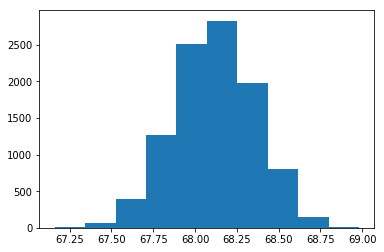

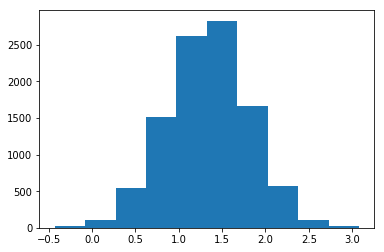

In [27]:
plt.hist(yes)
plt.show()
plt.hist(diff)
plt.show()

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

In [22]:
null_vals = np.random.normal(70, np.std(diff), 10000)

(array([   5.,   27.,  208., 1131., 2618., 3223., 1981.,  673.,  122.,
          12.]),
 array([67.91923941, 68.31055546, 68.70187151, 69.09318757, 69.48450362,
        69.87581967, 70.26713572, 70.65845178, 71.04976783, 71.44108388,
        71.83239993]),
 <a list of 10 Patch objects>)

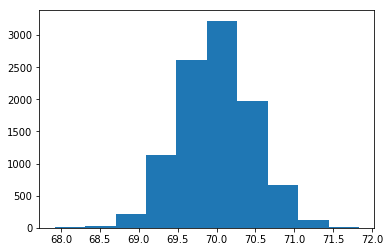

In [23]:
plt.hist(null_vals)

In [30]:
sample_mean = df.height.mean()
sample_mean

67.57907352931666

In [32]:
(null_vals > sample_mean).mean()  # p value. If this value is alpha, we can reject the null hypothesis

1.0

(array([  10.,   59.,  304., 1239., 2471., 3060., 1950.,  736.,  153.,
          18.]), array([-36.14503876, -28.33991447, -20.53479017, -12.72966588,
         -4.92454158,   2.88058271,  10.68570701,  18.49083131,
         26.2959556 ,  34.1010799 ,  41.90620419]), <a list of 10 Patch objects>)

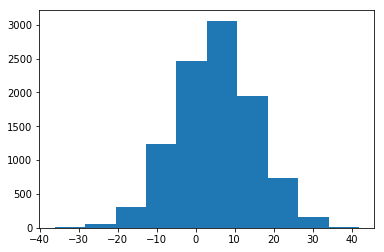

In [29]:
plt.hist(np.random.normal(5, 10, 10000))

## Which error is worse, type one or two?
The null hypothesis is that the defendant is innocent. Of course you wouldn't want to let a guilty person off the hook, but most people would say that sentencing an innocent person to such punishment is a worse consequence.